# CÀI THƯ VIỆN, ĐỌC DỮ LIỆU TỪ DRIVE

Cài đặt thư viện 

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.wrappers.scikit_learn import KerasRegressor
import os.path
from os import path
from pylab import rcParams
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import freq_to_period
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import pickle
import os
import joblib
import numpy as np
from keras.layers import Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
from statsmodels.tsa.stattools import grangercausalitytests
import datetime
from datetime import date
from statsmodels.tsa.api import VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Kết nối drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Đọc dữ liệu từ drive

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Thiết kế và phân tích thực nghiệm/dataset.csv")

# XỬ LÝ BỘ DỮ LIỆU


In [ ]:
data.Date = pd.to_datetime(data.Date, dayfirst = False) # đổi định dạng sang ngày cột Date 
data.set_index("Date", inplace = True) # chuyển cột đếm -> cột ngày tháng
data

,BTC/USD,DXY,Fear and Greed Index
Date,,,
2018-02-06,7737.37,89.674,8
2018-02-07,7588.01,90.340,36
2018-02-08,8259.76,90.278,30
2018-02-09,8693.98,90.324,44
2018-02-10,8560.00,90.224,54
...,...,...,...
2022-06-20,20555.44,104.480,9
2022-06-21,20712.29,104.425,9
2022-06-22,19963.68,104.184,11


# KIỂM TRA TÍNH DỪNG 

In [ ]:
result = adfuller(data['BTC/USD'], autolag='AIC')
print("BTC:")
print("")
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

print("\n-----------------------------------\n")

result = adfuller(data['DXY'], autolag='AIC')
print("DXY:")
print("")
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

print("\n-----------------------------------\n")

result = adfuller(data['Fear and Greed Index'], autolag='AIC')
print("Fear and Greed Index:")
print("")
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

print("\n-----------------------------------\n")

BTC:

ADF Statistic: -1.276189375455157
n_lags: 0.6399940932177943
p-value: 0.6399940932177943
Critial Values:
   1%, -3.434508723681996
Critial Values:
   5%, -2.863376828187341
Critial Values:
   10%, -2.567747894280675

-----------------------------------

DXY:

ADF Statistic: -1.2570107002989093
n_lags: 0.6486034677854909
p-value: 0.6486034677854909
Critial Values:
   1%, -3.4344668334240493
Critial Values:
   5%, -2.8633583388041717
Critial Values:
   10%, -2.5677380487468597

-----------------------------------

Fear and Greed Index:

ADF Statistic: -4.58494970440894
n_lags: 0.0001376765747370012
p-value: 0.0001376765747370012
Critial Values:
   1%, -3.434451341329522
Critial Values:
   5%, -2.863351500889469
Critial Values:
   10%, -2.567734407591096

-----------------------------------



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


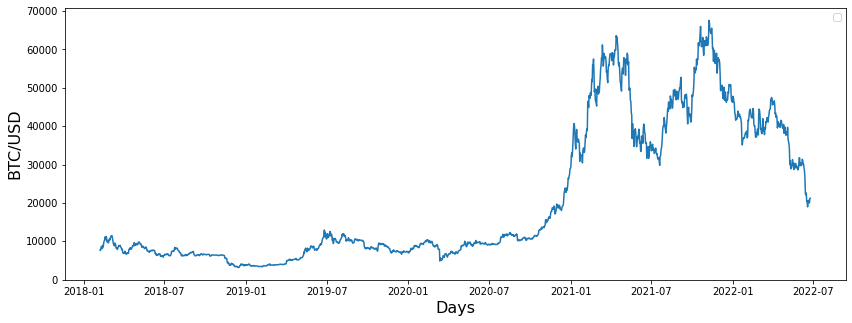

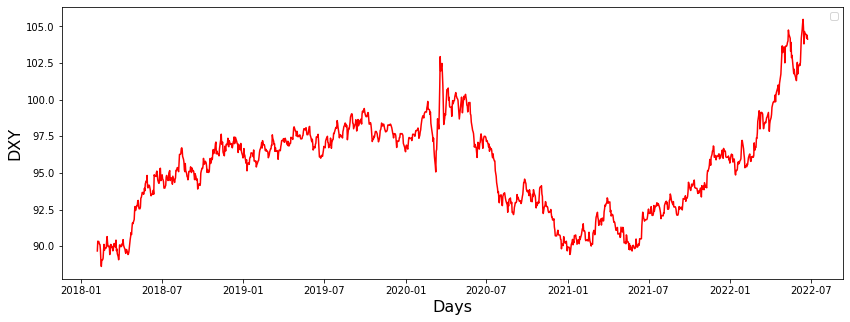

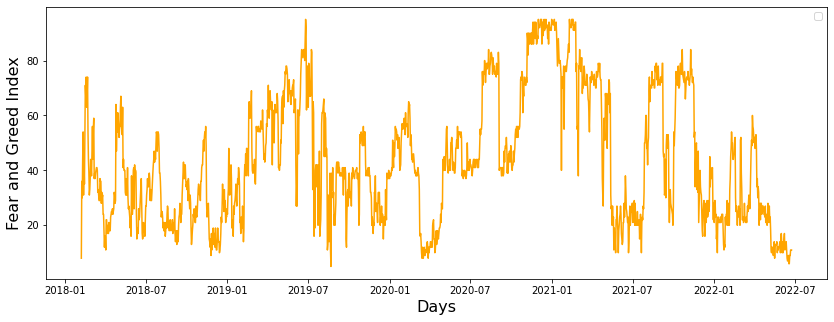

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(data.index[:],data['BTC/USD'])
plt.ylabel('BTC/USD', fontsize=16)
plt.xlabel('Days', fontsize=16)

plt.legend()

plt.figure(figsize=(14,5))
plt.plot(data.index[:],data['DXY'],color = 'red')
plt.ylabel('DXY', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.legend()

plt.figure(figsize=(14,5))
plt.plot(data.index[:],data['Fear and Greed Index'],color = 'orange')
plt.ylabel('Fear and Greed Index', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.legend()

# KIỂM TRA TÁC ĐỘNG GIỮA CÁC CHUỖI THỜI GIAN 

In [ ]:
print('\nBTC/USD causes DXY?')
print('------------------')
granger_1 = grangercausalitytests(data[['BTC/USD', 'DXY']], maxlag = 1)

print('\nDXY causes BTC/USD?')
print('------------------')
granger_2 = grangercausalitytests(data[['DXY', 'BTC/USD']], maxlag = 1)

print('\nBTC/USD causes Fear and Greed Index?')
print('------------------')
granger_1 = grangercausalitytests(data[['BTC/USD', 'Fear and Greed Index']], maxlag = 1)

print('\nFear and Greed Index causes BTC/USD?')
print('------------------')
granger_2 = grangercausalitytests(data[['Fear and Greed Index', 'BTC/USD']], maxlag = 1)



BTC/USD causes DXY?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4931  , p=0.0192  , df_denom=1596, df_num=1
ssr based chi2 test:   chi2=5.5034  , p=0.0190  , df=1
likelihood ratio test: chi2=5.4939  , p=0.0191  , df=1
parameter F test:         F=5.4931  , p=0.0192  , df_denom=1596, df_num=1

DXY causes BTC/USD?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8783  , p=0.3488  , df_denom=1596, df_num=1
ssr based chi2 test:   chi2=0.8799  , p=0.3482  , df=1
likelihood ratio test: chi2=0.8797  , p=0.3483  , df=1
parameter F test:         F=0.8783  , p=0.3488  , df_denom=1596, df_num=1

BTC/USD causes Fear and Greed Index?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3762  , p=0.0205  , df_denom=1596, df_num=1
ssr based chi2 test:   chi2=5.3864  , p=0.0203  , df=1
likelihood ratio test: chi2=5.3773  , p=0.0204  , df=1
parameter F test:        

# TẠO INPUT - OUTPUT 

In [ ]:
data_input_output = np.array(data)

## Input: Chỉ dùng chỉ số giá BTC trong quá khứ

Output: Giá BTC trong 3 ngày kế tiếp

In [ ]:
X_1_3days = []
Y_1_3days = []

n_future = 3 
n_past = 30 

for i in range(n_past, len(data_input_output) - n_future + 1):
  X_1_3days.append(data_input_output[i - n_past:i, 0:1])
  Y_1_3days.append(data_input_output[i : i + n_future, 0:1])

X_1_3days, Y_1_3days = np.array(X_1_3days), np.array(Y_1_3days)

size_train = int(len(data)*0.80)
X_train_1_3days = X_1_3days[:size_train] 
X_test_1_3days = X_1_3days[size_train:]
y_train_1_3days = Y_1_3days[:size_train] 
y_test_1_3days = Y_1_3days[size_train:]

y_test_1_3days = y_test_1_3days.reshape(len(y_test_1_3days),n_future)
y_train_1_3days = y_train_1_3days.reshape(len(y_train_1_3days),n_future)

Output: Giá BTC trong 7 ngày kế tiếp 

In [ ]:
X_1_7days = []
Y_1_7days = []

n_future = 7 
n_past = 30 

for i in range(n_past, len(data_input_output) - n_future + 1):
  X_1_7days.append(data_input_output[i - n_past:i, 0:1])
  Y_1_7days.append(data_input_output[i : i + n_future, 0:1])

X_1_7days, Y_1_7days = np.array(X_1_7days), np.array(Y_1_7days)

size_train = int(len(data)*0.80)
X_train_1_7days = X_1_7days[:size_train] 
X_test_1_7days = X_1_7days[size_train:]
y_train_1_7days = Y_1_7days[:size_train] 
y_test_1_7days = Y_1_7days[size_train:]

y_test_1_7days = y_test_1_7days.reshape(len(y_test_1_7days),n_future)
y_train_1_7days = y_train_1_7days.reshape(len(y_train_1_7days),n_future)

Output: Giá BTC trong 14 ngày kế tiếp

In [ ]:
X_1_14days = []
Y_1_14days = []

n_future = 14 
n_past = 30 

for i in range(n_past, len(data_input_output) - n_future + 1):
  X_1_14days.append(data_input_output[i - n_past:i, 0:1])
  Y_1_14days.append(data_input_output[i : i + n_future, 0:1])

X_1_14days, Y_1_14days = np.array(X_1_14days), np.array(Y_1_14days)

size_train = int(len(data)*0.80)
X_train_1_14days = X_1_14days[:size_train] 
X_test_1_14days = X_1_14days[size_train:]
y_train_1_14days = Y_1_14days[:size_train] 
y_test_1_14days = Y_1_14days[size_train:]

y_test_1_14days = y_test_1_14days.reshape(len(y_test_1_14days),n_future)
y_train_1_14days = y_train_1_14days.reshape(len(y_train_1_14days),n_future)

## Input: Dùng chỉ số giá BTC, DXY, Fear and Greed Index

Output: Giá BTC trong 3 ngày kế tiếp

In [ ]:
X_3_3days = []
Y_3_3days = []

n_future = 3 
n_past = 30 

for i in range(n_past, len(data_input_output) - n_future + 1):
  X_3_3days.append(data_input_output[i - n_past:i, 0:3])
  Y_3_3days.append(data_input_output[i : i + n_future, 0:1])

X_3_3days, Y_3_3days = np.array(X_3_3days), np.array(Y_3_3days)

size_train = int(len(data)*0.80)
X_train_3_3days = X_3_3days[:size_train] 
X_test_3_3days = X_3_3days[size_train:]
y_train_3_3days = Y_3_3days[:size_train] 
y_test_3_3days = Y_3_3days[size_train:]

y_test_3_3days = y_test_3_3days.reshape(len(y_test_3_3days),n_future)
y_train_3_3days = y_train_3_3days.reshape(len(y_train_3_3days),n_future)

Output: Giá BTC trong 7 ngày kế tiếp 

In [ ]:
X_3_7days = []
Y_3_7days = []

n_future = 7 
n_past = 30 

for i in range(n_past, len(data_input_output) - n_future + 1):
  X_3_7days.append(data_input_output[i - n_past:i, 0:3])
  Y_3_7days.append(data_input_output[i : i + n_future, 0:1])

X_3_7days, Y_3_7days = np.array(X_3_7days), np.array(Y_3_7days)

size_train = int(len(data)*0.80)
X_train_3_7days = X_3_7days[:size_train] 
X_test_3_7days = X_3_7days[size_train:]
y_train_3_7days = Y_3_7days[:size_train] 
y_test_3_7days = Y_3_7days[size_train:]

y_test_3_7days = y_test_3_7days.reshape(len(y_test_3_7days),n_future)
y_train_3_7days = y_train_3_7days.reshape(len(y_train_3_7days),n_future)

Output: Giá BTC trong 14 ngày kế tiếp

In [ ]:
X_3_14days = []
Y_3_14days = []

n_future = 14 
n_past = 30 

for i in range(n_past, len(data_input_output) - n_future + 1):
  X_3_14days.append(data_input_output[i - n_past:i, 0:3])
  Y_3_14days.append(data_input_output[i : i + n_future, 0:1])

X_3_14days, Y_3_14days = np.array(X_3_14days), np.array(Y_3_14days)

size_train = int(len(data)*0.80)
X_train_3_14days = X_3_14days[:size_train] 
X_test_3_14days = X_3_14days[size_train:]
y_train_3_14days = Y_3_14days[:size_train] 
y_test_3_14days = Y_3_14days[size_train:]

y_test_3_14days = y_test_3_14days.reshape(len(y_test_3_14days),n_future)
y_train_3_14days = y_train_3_14days.reshape(len(y_train_3_14days),n_future)

# MÔ HÌNH LSTM

In [ ]:
model_LSTM_1_3days = Sequential()
model_LSTM_1_3days.add(LSTM(64, activation='relu', input_shape=(X_train_1_3days.shape[1], X_train_1_3days.shape[2]), return_sequences=True))
model_LSTM_1_3days.add(LSTM(32, activation='relu', return_sequences=False))
model_LSTM_1_3days.add(Dropout(0.02))
model_LSTM_1_3days.add(Dense(25))
model_LSTM_1_3days.add(Dense(y_train_1_3days.shape[1]))
model_LSTM_1_3days.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_LSTM_1_3days.fit(X_train_1_3days,y_train_1_3days, epochs=10, batch_size=1, validation_split=0.1, verbose=1)
# Dự đoán trên tập test bằng mô hình LSTM 
y_pred_test_LSTM_1_3days = model_LSTM_1_3days.predict(X_test_1_3days)

Epoch 1/10
1152/1152 [==============================] - 21s 16ms/step - loss: 146764352.0000 - val_loss: 314624608.0000
Epoch 2/10
1152/1152 [==============================] - 14s 12ms/step - loss: 186895312.0000 - val_loss: 148975136.0000
Epoch 3/10
1152/1152 [==============================] - 13s 12ms/step - loss: 84363776.0000 - val_loss: 2414389248.0000
Epoch 4/10
1152/1152 [==============================] - 14s 12ms/step - loss: 35001688.0000 - val_loss: 115967576.0000
Epoch 5/10
1152/1152 [==============================] - 14s 12ms/step - loss: 32936728.0000 - val_loss: 195817680.0000
Epoch 6/10
1152/1152 [==============================] - 14s 12ms/step - loss: 21285808.0000 - val_loss: 154042848.0000
Epoch 7/10
1152/1152 [==============================] - 14s 12ms/step - loss: 13977428.0000 - val_loss: 122727184.0000
Epoch 8/10
1152/1152 [==============================] - 13s 12ms/step - loss: 11908253.0000 - val_loss: 87598552.0000
Epoch 9/10
1152/1152 [========================

In [ ]:
model_LSTM_1_7days = Sequential()
model_LSTM_1_7days.add(LSTM(64, activation='relu', input_shape=(X_train_1_7days.shape[1], X_train_1_7days.shape[2]), return_sequences=True))
model_LSTM_1_7days.add(LSTM(32, activation='relu', return_sequences=False))
model_LSTM_1_7days.add(Dropout(0.02))
model_LSTM_1_7days.add(Dense(25))
model_LSTM_1_7days.add(Dense(y_train_1_7days.shape[1]))
model_LSTM_1_7days.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_LSTM_1_7days.fit(X_train_1_7days,y_train_1_7days, epochs=10, batch_size=1, validation_split=0.1, verbose=1)
# Dự đoán trên tập test bằng mô hình LSTM 
y_pred_test_LSTM_1_7days = model_LSTM_1_7days.predict(X_test_1_7days)

Epoch 1/10
1152/1152 [==============================] - 16s 12ms/step - loss: 194492432.0000 - val_loss: 786807680.0000
Epoch 2/10
1152/1152 [==============================] - 14s 12ms/step - loss: 55151512.0000 - val_loss: 305072000.0000
Epoch 3/10
1152/1152 [==============================] - 14s 12ms/step - loss: 39187980.0000 - val_loss: 446218912.0000
Epoch 4/10
1152/1152 [==============================] - 13s 12ms/step - loss: 79218312.0000 - val_loss: 83537784.0000
Epoch 5/10
1152/1152 [==============================] - 13s 12ms/step - loss: 20191476.0000 - val_loss: 105083000.0000
Epoch 6/10
1152/1152 [==============================] - 13s 12ms/step - loss: 20392454.0000 - val_loss: 266212832.0000
Epoch 7/10
1152/1152 [==============================] - 14s 12ms/step - loss: 17321286.0000 - val_loss: 179715136.0000
Epoch 8/10
1152/1152 [==============================] - 14s 12ms/step - loss: 21512354.0000 - val_loss: 188859936.0000
Epoch 9/10
1152/1152 [==========================

In [ ]:
model_LSTM_1_14days = Sequential()
model_LSTM_1_14days.add(LSTM(64, activation='relu', input_shape=(X_train_1_14days.shape[1], X_train_1_14days.shape[2]), return_sequences=True))
model_LSTM_1_14days.add(LSTM(32, activation='relu', return_sequences=False))
model_LSTM_1_14days.add(Dropout(0.02))
model_LSTM_1_14days.add(Dense(25))
model_LSTM_1_14days.add(Dense(y_train_1_14days.shape[1]))
model_LSTM_1_14days.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_LSTM_1_14days.fit(X_train_1_14days,y_train_1_14days, epochs=10, batch_size=1, validation_split=0.1, verbose=1)
# Dự đoán trên tập test bằng mô hình LSTM 
y_pred_test_LSTM_1_14days = model_LSTM_1_14days.predict(X_test_1_14days)

Epoch 1/10
1152/1152 [==============================] - 15s 12ms/step - loss: 175552960.0000 - val_loss: 177950800.0000
Epoch 2/10
1152/1152 [==============================] - 13s 12ms/step - loss: 32170504.0000 - val_loss: 918373696.0000
Epoch 3/10
1152/1152 [==============================] - 13s 12ms/step - loss: 27644070.0000 - val_loss: 97554544.0000
Epoch 4/10
1152/1152 [==============================] - 13s 12ms/step - loss: 13474112.0000 - val_loss: 106950664.0000
Epoch 5/10
1152/1152 [==============================] - 15s 13ms/step - loss: 12304723.0000 - val_loss: 114029632.0000
Epoch 6/10
1152/1152 [==============================] - 14s 12ms/step - loss: 13058772.0000 - val_loss: 105989680.0000
Epoch 7/10
1152/1152 [==============================] - 13s 12ms/step - loss: 17056858.0000 - val_loss: 175925120.0000
Epoch 8/10
1152/1152 [==============================] - 13s 11ms/step - loss: 10772140.0000 - val_loss: 75257144.0000
Epoch 9/10
1152/1152 [===========================

In [ ]:
model_LSTM_3_3days = Sequential()
model_LSTM_3_3days.add(LSTM(64, activation='relu', input_shape=(X_train_3_3days.shape[1], X_train_3_3days.shape[2]), return_sequences=True))
model_LSTM_3_3days.add(LSTM(32, activation='relu', return_sequences=False))
model_LSTM_3_3days.add(Dropout(0.02))
model_LSTM_3_3days.add(Dense(25))
model_LSTM_3_3days.add(Dense(y_train_3_3days.shape[1]))
model_LSTM_3_3days.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_LSTM_3_3days.fit(X_train_3_3days,y_train_3_3days, epochs=15, batch_size=1, validation_split=0.1, verbose=1)
# Dự đoán trên tập test bằng mô hình LSTM 
y_pred_test_LSTM_3_3days = model_LSTM_3_3days.predict(X_test_3_3days)

Epoch 1/15
1152/1152 [==============================] - 15s 12ms/step - loss: 304681984.0000 - val_loss: 104590792.0000
Epoch 2/15
1152/1152 [==============================] - 14s 12ms/step - loss: 138159360.0000 - val_loss: 712456768.0000
Epoch 3/15
1152/1152 [==============================] - 13s 12ms/step - loss: 69531872.0000 - val_loss: 265527872.0000
Epoch 4/15
1152/1152 [==============================] - 14s 12ms/step - loss: 28800482.0000 - val_loss: 290709472.0000
Epoch 5/15
1152/1152 [==============================] - 14s 12ms/step - loss: 75040864.0000 - val_loss: 63077572.0000
Epoch 6/15
1152/1152 [==============================] - 14s 12ms/step - loss: 10060161.0000 - val_loss: 94656224.0000
Epoch 7/15
1152/1152 [==============================] - 14s 12ms/step - loss: 10193467.0000 - val_loss: 63988256.0000
Epoch 8/15
1152/1152 [==============================] - 14s 12ms/step - loss: 7947941.5000 - val_loss: 23629902.0000
Epoch 9/15
1152/1152 [=============================

In [ ]:
model_LSTM_3_7days = Sequential()
model_LSTM_3_7days.add(LSTM(64, activation='relu', input_shape=(X_train_3_7days.shape[1], X_train_3_7days.shape[2]), return_sequences=True))
model_LSTM_3_7days.add(LSTM(32, activation='relu', return_sequences=False))
model_LSTM_3_7days.add(Dropout(0.02))
model_LSTM_3_7days.add(Dense(25))
model_LSTM_3_7days.add(Dense(y_train_3_7days.shape[1]))
model_LSTM_3_7days.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_LSTM_3_7days.fit(X_train_3_7days,y_train_3_7days, epochs=15, batch_size=1, validation_split=0.1, verbose=1)
# Dự đoán trên tập test bằng mô hình LSTM 
y_pred_test_LSTM_3_7days = model_LSTM_3_7days.predict(X_test_3_7days)

Epoch 1/15
1152/1152 [==============================] - 16s 12ms/step - loss: 78826720.0000 - val_loss: 74513472.0000
Epoch 2/15
1152/1152 [==============================] - 13s 12ms/step - loss: 14242871.0000 - val_loss: 88716248.0000
Epoch 3/15
1152/1152 [==============================] - 13s 12ms/step - loss: 14290872.0000 - val_loss: 80385112.0000
Epoch 4/15
1152/1152 [==============================] - 13s 12ms/step - loss: 12136042.0000 - val_loss: 60469844.0000
Epoch 5/15
1152/1152 [==============================] - 14s 12ms/step - loss: 14551686.0000 - val_loss: 192628144.0000
Epoch 6/15
1152/1152 [==============================] - 14s 12ms/step - loss: 15614091.0000 - val_loss: 58891848.0000
Epoch 7/15
1152/1152 [==============================] - 14s 12ms/step - loss: 10879836.0000 - val_loss: 75254048.0000
Epoch 8/15
1152/1152 [==============================] - 14s 12ms/step - loss: 14650407.0000 - val_loss: 93790432.0000
Epoch 9/15
1152/1152 [==============================] -

In [ ]:
model_LSTM_3_14days = Sequential()
model_LSTM_3_14days.add(LSTM(64, activation='relu', input_shape=(X_train_3_14days.shape[1], X_train_3_14days.shape[2]), return_sequences=True))
model_LSTM_3_14days.add(LSTM(32, activation='relu', return_sequences=False))
model_LSTM_3_14days.add(Dropout(0.02))
model_LSTM_3_14days.add(Dense(25))
model_LSTM_3_14days.add(Dense(y_train_3_14days.shape[1]))
model_LSTM_3_14days.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_LSTM_3_14days.fit(X_train_3_14days,y_train_3_14days, epochs=15, batch_size=1, validation_split=0.1, verbose=1)
# Dự đoán trên tập test bằng mô hình LSTM 
y_pred_test_LSTM_3_14days = model_LSTM_3_14days.predict(X_test_3_14days)

Epoch 1/15
1152/1152 [==============================] - 15s 12ms/step - loss: 251136576.0000 - val_loss: 449863808.0000
Epoch 2/15
1152/1152 [==============================] - 14s 12ms/step - loss: 109683184.0000 - val_loss: 233377488.0000
Epoch 3/15
1152/1152 [==============================] - 13s 12ms/step - loss: 14656380.0000 - val_loss: 107774144.0000
Epoch 4/15
1152/1152 [==============================] - 13s 12ms/step - loss: 54236396.0000 - val_loss: 185625008.0000
Epoch 5/15
1152/1152 [==============================] - 13s 12ms/step - loss: 22671002.0000 - val_loss: 156957280.0000
Epoch 6/15
1152/1152 [==============================] - 13s 12ms/step - loss: 18097660.0000 - val_loss: 98062728.0000
Epoch 7/15
1152/1152 [==============================] - 14s 12ms/step - loss: 16059650.0000 - val_loss: 343275488.0000
Epoch 8/15
1152/1152 [==============================] - 14s 12ms/step - loss: 59354664.0000 - val_loss: 174053184.0000
Epoch 9/15
1152/1152 [=========================

In [ ]:
print("LSTM - 1 - 3days")
print("MSE  : " + str(mean_squared_error(y_test_1_3days, y_pred_test_LSTM_1_3days)))
print("MAE  : " + str(mean_absolute_error(y_test_1_3days, y_pred_test_LSTM_1_3days)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_1_3days, y_pred_test_LSTM_1_3days)*100))
print("")
print("LSTM - 1 - 7days")
print("MSE  : " + str(mean_squared_error(y_test_1_7days, y_pred_test_LSTM_1_7days)))
print("MAE  : " + str(mean_absolute_error(y_test_1_7days, y_pred_test_LSTM_1_7days)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_1_7days, y_pred_test_LSTM_1_7days)*100))
print("")
print("LSTM - 1 - 14days")
print("MSE  : " + str(mean_squared_error(y_test_1_14days, y_pred_test_LSTM_1_14days)))
print("MAE  : " + str(mean_absolute_error(y_test_1_14days, y_pred_test_LSTM_1_14days)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_1_14days, y_pred_test_LSTM_1_14days)*100))
print("")
print("LSTM - 3 - 3days")
print("MSE  : " + str(mean_squared_error(y_test_3_3days, y_pred_test_LSTM_3_3days)))
print("MAE  : " + str(mean_absolute_error(y_test_3_3days, y_pred_test_LSTM_3_3days)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_3_3days, y_pred_test_LSTM_3_3days)*100))
print("")
print("LSTM - 3 - 7days")
print("MSE  : " + str(mean_squared_error(y_test_3_7days, y_pred_test_LSTM_3_7days)))
print("MAE  : " + str(mean_absolute_error(y_test_3_7days, y_pred_test_LSTM_3_7days)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_3_7days, y_pred_test_LSTM_3_7days)*100))
print("")
print("LSTM - 3 - 14days")
print("MSE  : " + str(mean_squared_error(y_test_3_14days, y_pred_test_LSTM_3_14days)))
print("MAE  : " + str(mean_absolute_error(y_test_3_14days, y_pred_test_LSTM_3_14days)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_3_14days, y_pred_test_LSTM_3_14days)*100))


LSTM - 1 - 3days
MSE  : 42511900.95569266
MAE  : 5504.633682725696
MAPE : 13.683648852410036

LSTM - 1 - 7days
MSE  : 84307364.66141309
MAE  : 7488.822204044582
MAPE : 18.078746450099008

LSTM - 1 - 14days
MSE  : 73058859.38150683
MAE  : 6402.595334025676
MAPE : 15.025083067484138

LSTM - 3 - 3days
MSE  : 17820452.857461475
MAE  : 3404.084194155092
MAPE : 8.381001170319458

LSTM - 3 - 7days
MSE  : 36440689.52672639
MAE  : 5166.873146181781
MAPE : 12.758948519053606

LSTM - 3 - 14days
MSE  : 85108256.2328191
MAE  : 7706.636038530656
MAPE : 18.573857576124254


# MÔ HÌNH VAR

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
data_var_1 = data.copy()
data_var_3 = data.copy()

In [ ]:
del data_var_1['DXY']
del data_var_1['Fear and Greed Index']
data_var_1['BTC/USD 2'] = data_var_1['BTC/USD']

In [ ]:
nobs_3 = 3
nobs_7 = 7
nobs_14 = 14


data_train_var_1_3days, data_test_var_1_3days = data_var_1[0:-nobs_3], data_var_1[-nobs_3:]

data_train_var_1_7days, data_test_var_1_7days = data_var_1[0:-nobs_7], data_var_1[-nobs_7:]

data_train_var_1_14days, data_test_var_1_14days = data_var_1[0:-nobs_14], data_var_1[-nobs_14:]

data_train_var_3_3days, data_test_var_3_3days = data_var_3[0:-nobs_3], data_var_3[-nobs_3:]

data_train_var_3_7days, data_test_var_3_7days = data_var_3[0:-nobs_7], data_var_3[-nobs_7:]

data_train_var_3_14days, data_test_var_3_14days = data_var_3[0:-nobs_14], data_var_3[-nobs_14:]


data_train_var_1_3days_diff = data_train_var_1_3days.diff().dropna()
data_train_var_1_7days_diff = data_train_var_1_7days.diff().dropna()
data_train_var_1_14days_diff = data_train_var_1_14days.diff().dropna()
data_train_var_3_3days_diff = data_train_var_3_3days.diff().dropna()
data_train_var_3_7days_diff = data_train_var_3_7days.diff().dropna() 
data_train_var_3_14days_diff = data_train_var_3_14days.diff().dropna()

In [ ]:
maxlags = 10
model_VAR_1_3days = VAR(data_train_var_1_3days_diff)
model_VAR_1_7days = VAR(data_train_var_1_7days_diff)
model_VAR_1_14days = VAR(data_train_var_1_14days_diff)
model_VAR_3_3days = VAR(data_train_var_3_3days_diff)
model_VAR_3_7days = VAR(data_train_var_3_7days_diff)
model_VAR_3_14days = VAR(data_train_var_3_14days_diff)

lag_order = 10
fitted_model_VAR_1_3days = model_VAR_1_3days.fit(10)
fitted_model_VAR_1_7days = model_VAR_1_7days.fit(10)
fitted_model_VAR_1_14days = model_VAR_1_14days.fit(10)
fitted_model_VAR_3_3days = model_VAR_3_3days.fit(10)
fitted_model_VAR_3_7days = model_VAR_3_7days.fit(10)
fitted_model_VAR_3_14days = model_VAR_3_14days.fit(10)

# Get the lag order
#lag_order = fitted_model.k_ar

# Input data for forecasting
forecast_input_var_1_3days = data_train_var_1_3days_diff.values[-30:]
forecast_input_var_1_7days = data_train_var_1_7days_diff.values[-30:]
forecast_input_var_1_14days = data_train_var_1_14days_diff.values[-30:]
forecast_input_var_3_3days = data_train_var_3_3days_diff.values[-30:]
forecast_input_var_3_7days = data_train_var_3_7days_diff.values[-30:]
forecast_input_var_3_14days = data_train_var_3_14days_diff.values[-30:]

# Forecast
fc_diff_VAR_1_3days = fitted_model_VAR_1_3days.forecast(y = forecast_input_var_1_3days, steps = nobs_3)
df_diff_VAR_1_3days = pd.DataFrame(fc_diff_VAR_1_3days, columns = ['BTC/USD','BTC/USD 2'], index = data_test_var_1_3days.index[0:nobs_3])

fc_diff_VAR_1_7days = fitted_model_VAR_1_7days.forecast(y = forecast_input_var_1_7days, steps = nobs_7)
df_diff_VAR_1_7days = pd.DataFrame(fc_diff_VAR_1_7days, columns = ['BTC/USD','BTC/USD 2'], index = data_test_var_1_7days.index[0:nobs_7])

fc_diff_VAR_1_14days = fitted_model_VAR_1_14days.forecast(y = forecast_input_var_1_14days, steps = nobs_14)
df_diff_VAR_1_14days = pd.DataFrame(fc_diff_VAR_1_14days, columns = ['BTC/USD','BTC/USD 2'], index = data_test_var_1_14days.index[0:nobs_14])

fc_diff_VAR_3_3days = fitted_model_VAR_3_3days.forecast(y = forecast_input_var_3_3days, steps = nobs_3)
df_diff_VAR_3_3days = pd.DataFrame(fc_diff_VAR_3_3days, columns = ['BTC/USD','DXY', 'Fear and Greed Index'], index = data_test_var_3_3days.index[0:nobs_3])

fc_diff_VAR_3_7days = fitted_model_VAR_3_7days.forecast(y = forecast_input_var_3_7days, steps = nobs_7)
df_diff_VAR_3_7days = pd.DataFrame(fc_diff_VAR_3_7days, columns = ['BTC/USD','DXY', 'Fear and Greed Index'], index = data_test_var_3_7days.index[0:nobs_7])

fc_diff_VAR_3_14days = fitted_model_VAR_3_14days.forecast(y = forecast_input_var_3_14days, steps = nobs_14)
df_diff_VAR_3_14days = pd.DataFrame(fc_diff_VAR_3_14days, columns = ['BTC/USD','DXY', 'Fear and Greed Index'], index = data_test_var_3_14days.index[0:nobs_14])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [ ]:
def invert(df_diff, first_value):
  Value = []
  if df_diff.shape[1] != first_value.shape[0]: 
    print('Cannot invert')
  else:
    for i in range(len(df_diff.values)):
      a = first_value + df_diff.values[i,:]
      Value.append(a)
      first_value = Value[len(Value)-1]
    print('Invert successfull')
    df = pd.DataFrame(Value, columns = df_diff.columns, index = df_diff.index)
    return df

In [ ]:
df_VAR_1_3days = invert(df_diff_VAR_1_3days,data_train_var_1_3days.values[len(data_train_var_1_3days)-1])
df_VAR_1_7days = invert(df_diff_VAR_1_7days,data_train_var_1_7days.values[len(data_train_var_1_7days)-1])
df_VAR_1_14days = invert(df_diff_VAR_1_14days,data_train_var_1_14days.values[len(data_train_var_1_14days)-1])
df_VAR_3_3days = invert(df_diff_VAR_3_3days,data_train_var_3_3days.values[len(data_train_var_3_3days)-1])
df_VAR_3_7days = invert(df_diff_VAR_3_7days,data_train_var_3_7days.values[len(data_train_var_3_7days)-1])
df_VAR_3_14days = invert(df_diff_VAR_3_14days,data_train_var_3_14days.values[len(data_train_var_3_14days)-1])

Invert successfull
Invert successfull
Invert successfull
Invert successfull
Invert successfull
Invert successfull


In [ ]:
print("VAR - 1 - 3days")
print('MSE  : ',mean_squared_error(data_test_var_1_3days['BTC/USD'], df_VAR_1_3days['BTC/USD'], squared=True))
print('MAE  : ',mean_absolute_error(data_test_var_1_3days['BTC/USD'], df_VAR_1_3days['BTC/USD']))
print('MAPE : ',mean_absolute_percentage_error(data_test_var_1_3days['BTC/USD'], df_VAR_1_3days['BTC/USD'])*100)

print("")

print("VAR - 1 - 7days")
print('MSE  : ',mean_squared_error(data_test_var_1_7days['BTC/USD'], df_VAR_1_7days['BTC/USD'], squared=True))
print('MAE  : ',mean_absolute_error(data_test_var_1_7days['BTC/USD'], df_VAR_1_7days['BTC/USD']))
print('MAPE : ',mean_absolute_percentage_error(data_test_var_1_7days['BTC/USD'], df_VAR_1_7days['BTC/USD'])*100)

print("")

print("VAR - 1 - 14days")
print('MSE  : ',mean_squared_error(data_test_var_1_14days['BTC/USD'], df_VAR_1_14days['BTC/USD'], squared=True))
print('MAE  : ',mean_absolute_error(data_test_var_1_14days['BTC/USD'], df_VAR_1_14days['BTC/USD']))
print('MAPE : ',mean_absolute_percentage_error(data_test_var_1_14days['BTC/USD'], df_VAR_1_14days['BTC/USD'])*100)
print("")

print("VAR - 3 - 3days")
print('MSE : ',mean_squared_error(data_test_var_3_3days['BTC/USD'], df_VAR_3_3days['BTC/USD'], squared=True))
print('MAE  : ',mean_absolute_error(data_test_var_3_3days['BTC/USD'], df_VAR_3_3days['BTC/USD']))
print('MAPE : ',mean_absolute_percentage_error(data_test_var_3_3days['BTC/USD'], df_VAR_3_3days['BTC/USD'])*100)
print("")

print("VAR - 3 - 7days")
print('MSE  : ',mean_squared_error(data_test_var_3_7days['BTC/USD'], df_VAR_3_7days['BTC/USD'], squared=True))
print('MAE  : ',mean_absolute_error(data_test_var_3_7days['BTC/USD'], df_VAR_3_7days['BTC/USD']))
print('MAPE : ',mean_absolute_percentage_error(data_test_var_3_7days['BTC/USD'], df_VAR_3_7days['BTC/USD'])*100)
print("")

print("VAR - 3 - 14days")
print('MSE  : ',mean_squared_error(data_test_var_3_14days['BTC/USD'], df_VAR_3_14days['BTC/USD'], squared=True))
print('MAE  : ',mean_absolute_error(data_test_var_3_14days['BTC/USD'], df_VAR_3_14days['BTC/USD']))
print('MAPE : ',mean_absolute_percentage_error(data_test_var_3_14days['BTC/USD'], df_VAR_3_14days['BTC/USD'])*100)
print("")

VAR - 1 - 3days
MSE  :  429323.17084455636
MAE  :  623.8008480806699
MAPE :  2.9807104243422518

VAR - 1 - 7days
MSE  :  686063.7706866184
MAE  :  642.4538979112606
MAPE :  3.163201888253265

VAR - 1 - 14days
MSE  :  57968967.08841268
MAE  :  7194.507888530047
MAPE :  34.43160752345044

VAR - 3 - 3days
MSE :  257839.336129179
MAE  :  501.00026205082395
MAPE :  2.424071742706355

VAR - 3 - 7days
MSE  :  671454.7657601906
MAE  :  556.6350659555309
MAPE :  2.8120392582737197

VAR - 3 - 14days
MSE  :  63290151.48775984
MAE  :  7496.6339129578255
MAPE :  35.907138652925134

